In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

from gstools import SRF, Gaussian
from gstools.random import MasterRNG
from scipy import integrate

In [2]:
m = 100
n = 110

In [3]:
x = np.linspace(0, 1, m)

In [4]:
print(x)

[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898

In [5]:
seed = MasterRNG(45)
def one_function(x):
    model = Gaussian(dim =1,  var =3, len_scale= 0.3)
    srf= SRF(model, seed=seed())
    f = srf.structured([x])
    return f

In [6]:
U = np.zeros((m,n))
for i in range(m):
    U[:,i] = one_function(x)

In [7]:
print(U.shape)

(100, 110)


In [8]:
print(U)

[[ 0.09697055  0.18203776  0.62625848 ...  0.          0.
   0.        ]
 [ 0.26906781  0.04565353  0.63722051 ...  0.          0.
   0.        ]
 [ 0.44763625 -0.09240118  0.64723774 ...  0.          0.
   0.        ]
 ...
 [-0.51559073 -1.04475022 -1.41395892 ...  0.          0.
   0.        ]
 [-0.3328682  -0.91703105 -1.41624014 ...  0.          0.
   0.        ]
 [-0.15220292 -0.78962905 -1.41045278 ...  0.          0.
   0.        ]]


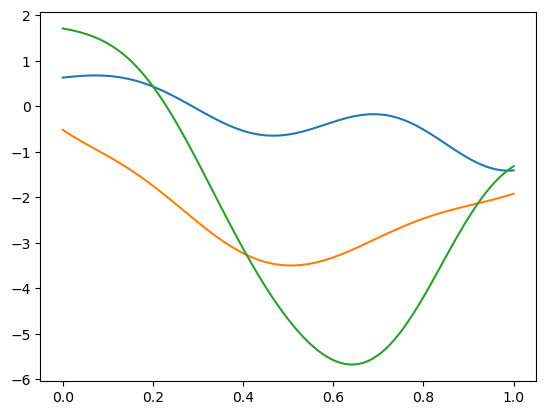

In [9]:
plt.plot(x, U[:, 2:5])

In [10]:
def integrate_one_function(f):
    result = np.zeros_like(f)
    result[0]=0
    for i in range(1, len(f)):
        result[i]= integrate.simps(f[:i+1],x[:i+1])
    return result

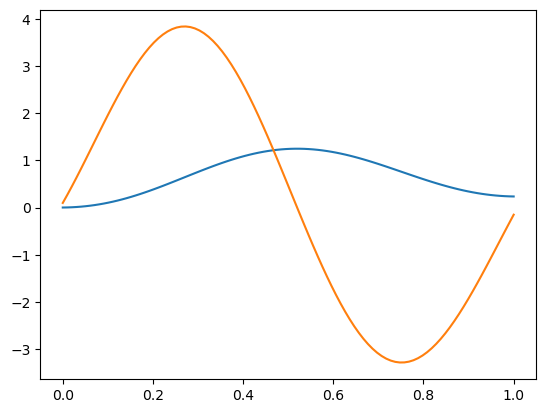

In [11]:
f = U[:,0]
f_int = integrate_one_function(f)
plt.plot(x,f_int)
plt.plot(x,f)

In [12]:
S = np.zeros((m,n))
for i in range(n):
    S[:,i] = integrate_one_function(U[:,i])

In [13]:
print(S[:,0])

[0.         0.00184868 0.0054575  0.01090924 0.01823242 0.02748437
 0.0386747  0.05183379 0.0669516  0.08403078 0.10304143 0.12395847
 0.14673245 0.17131131 0.19762686 0.22560154 0.25514971 0.28617036
 0.31856215 0.35220327 0.38697879 0.4227492  0.45938836 0.49674256
 0.5346771  0.57302784 0.61165426 0.65038574 0.68907879 0.72756034
 0.76568679 0.80328655 0.84021876 0.87631717 0.9114463  0.94544894
 0.97819747 1.00954709 1.03938038 1.06756797 1.09400464 1.11857914
 1.1412002  1.16177694 1.18023342 1.19650097 1.21052007 1.22224554
 1.23163509 1.23866789 1.24331923 1.24559302 1.24548225 1.24301545
 1.23820302 1.23109757 1.22172632 1.21016496 1.19645666 1.18069878
 1.16294923 1.14332525 1.12189808 1.09880265 1.07412188 1.04800595
 1.02054753 0.99190935 0.96219181 0.93156719 0.90014146 0.86809338
 0.83553219 0.8026399  0.76952671 0.73637463 0.70329249 0.67045905
 0.6379795  0.60602618 0.57469842 0.54415916 0.51449981 0.48587105
 0.45835449 0.43208605 0.40713582 0.38362277 0.36160402 0.3411

In [14]:
# us -> m*n = 11000 ==> us (11000,100) 
# xs -> (11000, 1)
# ss -> (11000, 1)

In [15]:
#m = 100
#n = 110

def interate_data(m=m , n=n, x=x, U=U, S=S):
    us= np.zeros((m*n, m))
    xs= np.zeros((m*n, 1))
    ss= np.zeros((m*n, 1))
    for i in range(n):
        for j in range(m):
            us[i*m+j, :] = U[:,i]
            xs[i*m+j, :] = x[j]
            ss[i*m+j, :] = S[j,i]
    return us, xs, ss

In [16]:
us, xs, ss = interate_data()
print(us.shape, xs.shape, ss.shape)

(11000, 100) (11000, 1) (11000, 1)


In [17]:
#us
#xs
#ss

In [18]:
def batch_dataset(batch_size, m=m, n=n,x=x, U=U, S=S, ratio=0.9):
    us, xs, ss = interate_data(m, n, x, U, S)
    
    train_size = int(len(us)*ratio)
    us_train = us[:train_size]
    xs_train = xs[:train_size]
    ss_train = ss[:train_size]
    
    us_test = us[train_size:]
    xs_test = xs[train_size:]
    ss_test = ss[train_size:]
    
    us_train = torch.tensor(us_train, dtype=torch.float32)
    xs_train = torch.tensor(xs_train, dtype=torch.float32)
    ss_train = torch.tensor(ss_train, dtype=torch.float32)
    train_dataset = torch.utils.data.TensorDataset(us_train,xs_train,ss_train)
    train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    
    us_test = torch.tensor(us_test, dtype=torch.float32)
    xs_test = torch.tensor(xs_test, dtype=torch.float32)
    ss_test = torch.tensor(ss_test, dtype=torch.float32)
    test_dataset = torch.utils.data.TensorDataset(us_test,xs_test,ss_test)
    test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
    
    return train_dataloader, test_dataloader

In [19]:
train_data, test_data = batch_dataset(batch_size=32,ratio=0.9 )

In [20]:
for u_batch, x_batch, s_batch in train_data:
    print(u_batch.shape,x_batch.shape, s_batch.shape)
    break

torch.Size([32, 100]) torch.Size([32, 1]) torch.Size([32, 1])


In [21]:
#u_batch
#x_batch
#s_batch

In [22]:
x1 = torch.tensor([[1,2],
                  [3,4],
                  [5,6]])
print(x1.shape)

x2 = torch.tensor([[2,3],
                  [4,5],
                  [6,7]])
print(x2.shape)

torch.Size([3, 2])
torch.Size([3, 2])


In [23]:
result = torch.einsum("bi, bi->b", x1, x2)
print(result)

tensor([ 8, 32, 72])


In [24]:
# first elem = (1*2)+(2*3) =8
# second elem = (3*4)+(4*5) =32
# third elem = (5*6)+(6*7) = 72

In [25]:
x1 = torch.tensor([[1,2],
                  [3,4],
                  [5,6]])
print(x1.shape)

x2 = torch.tensor([[2,3],
                  [4,5],
                  [6,7]])
print(x2.shape)

torch.Size([3, 2])
torch.Size([3, 2])


In [26]:
result = torch.einsum("bi, bi->i", x1, x2)
print(result)

tensor([44, 68])


In [27]:
print("first element", 1*2 + 3* 4 + 5 * 6)
print("second element", 2*3 + 4* 5 + 6 * 7)

first element 44
second element 68


In [28]:
x1 = torch.tensor([[1,2,3,4]])
print(x1.shape)

x2 = torch.tensor([[2,3,4,5]])
print(x2.shape)

torch.Size([1, 4])
torch.Size([1, 4])


In [29]:
result = torch.einsum("bi, bi->b", x1, x2)
print(result)

tensor([40])


In [30]:
result = torch.einsum("bi, bi->i", x1, x2)
print(result)

tensor([ 2,  6, 12, 20])


In [31]:
class DeepONet(nn.Module):
    def __init__(self, neurons=40, in1=1, in2=1, output_neurons =20):
        super(DeepONet, self).__init__()
        self.in1 = in1
        self.in2 = in2
        self.output_neurons = output_neurons
        self.neurons = neurons
        
        self.branch = self.branch_network()
        self.trunk = self.trunk_network()
    
    def branch_network(self):
        branch = nn.Sequential(
            nn.Linear(self.in1, self.neurons), 
            nn.ReLU(), 
            nn.Linear(self.neurons, self.neurons),
            nn.ReLU(),
            nn.Linear(self.neurons, self.output_neurons),
        )
        return branch
        
    def trunk_network(self):
        trunk = nn.Sequential(
            nn.Linear(self.in2, self.neurons), 
            nn.ReLU(), 
            nn.Linear(self.neurons, self.neurons), 
            nn.ReLU(), 
            nn.Linear(self.neurons, self.neurons), 
            nn.ReLU(), 
            nn.Linear(self.neurons, self.output_neurons),
        )
        return trunk
        
    def forward(self, x1, x2):
        x1 = self.branch(x1)
        x2 = self.trunk(x2)
        x = torch.einsum("bi, bi->b", x1, x2)
        x = torch.unsqueeze(x,1)
        return x

In [32]:
model = DeepONet(neurons=40, in1= m, in2=1)

In [33]:
model

DeepONet(
  (branch): Sequential(
    (0): Linear(in_features=100, out_features=40, bias=True)
    (1): ReLU()
    (2): Linear(in_features=40, out_features=40, bias=True)
    (3): ReLU()
    (4): Linear(in_features=40, out_features=20, bias=True)
  )
  (trunk): Sequential(
    (0): Linear(in_features=1, out_features=40, bias=True)
    (1): ReLU()
    (2): Linear(in_features=40, out_features=40, bias=True)
    (3): ReLU()
    (4): Linear(in_features=40, out_features=40, bias=True)
    (5): ReLU()
    (6): Linear(in_features=40, out_features=20, bias=True)
  )
)

In [34]:
def loss(y_pred, y):
    return torch.mean((y_pred - y)**2)

In [35]:
optimizer =torch.optim.Adam(model.parameters(), lr=0.001)

In [36]:
train_losses = []
epochs = 2000

for i in range(epochs):
    l_total = 0
    for u_batch, x_batch, s_batch in train_data:
        model.train()
        optimizer.zero_grad()
        y_pred = model(u_batch,x_batch)
        
        l= loss(y_pred, s_batch)
        l_total += l.item()
        l.backward()
        optimizer.step()
    
    l_total = l_total/len(train_data)
    train_losses.append(l_total)
    
    if i%20 ==0:
        print("Epoch: ", i ,"/", epochs, "loss: ", l_total)

Epoch:  0 / 2000 loss:  0.04523198919130429
Epoch:  20 / 2000 loss:  0.0013600762747603679
Epoch:  40 / 2000 loss:  0.00017781469175515082
Epoch:  60 / 2000 loss:  0.00022121458558455831
Epoch:  80 / 2000 loss:  0.00022207419606861696
Epoch:  100 / 2000 loss:  0.00032856261148539955
Epoch:  120 / 2000 loss:  0.000313534674334674
Epoch:  140 / 2000 loss:  0.00033606417280445327
Epoch:  160 / 2000 loss:  0.00013030482110597434
Epoch:  180 / 2000 loss:  0.0001224893278401484
Epoch:  200 / 2000 loss:  8.932312391534065e-05
Epoch:  220 / 2000 loss:  0.0002822582696910925
Epoch:  240 / 2000 loss:  0.00016968275809748804
Epoch:  260 / 2000 loss:  0.0003223766501011391
Epoch:  280 / 2000 loss:  0.00015727597741304987
Epoch:  300 / 2000 loss:  5.84543062095397e-05
Epoch:  320 / 2000 loss:  0.00010239156155524054
Epoch:  340 / 2000 loss:  0.0001426985096259159
Epoch:  360 / 2000 loss:  8.771538572428623e-05
Epoch:  380 / 2000 loss:  9.882797731411448e-05
Epoch:  400 / 2000 loss:  5.3761255751470

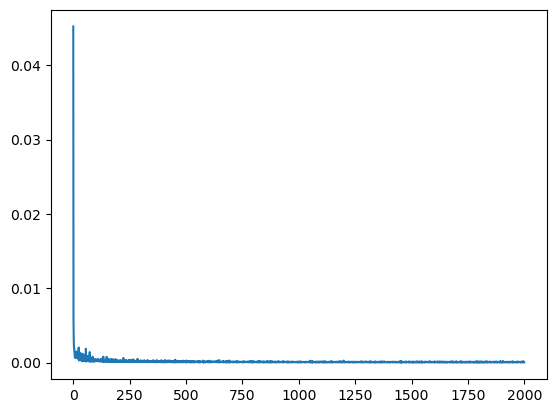

In [39]:
plt.plot(train_losses)

In [43]:
my_func = lambda x: np.cos(5*x)
inter = lambda x : 1/5*np.sin(5*x)
u_t = my_func(x)
s_t = inter(x)

In [46]:
u_t.shape, s_t.shape

((100,), (100,))

In [47]:
model.eval()

DeepONet(
  (branch): Sequential(
    (0): Linear(in_features=100, out_features=40, bias=True)
    (1): ReLU()
    (2): Linear(in_features=40, out_features=40, bias=True)
    (3): ReLU()
    (4): Linear(in_features=40, out_features=20, bias=True)
  )
  (trunk): Sequential(
    (0): Linear(in_features=1, out_features=40, bias=True)
    (1): ReLU()
    (2): Linear(in_features=40, out_features=40, bias=True)
    (3): ReLU()
    (4): Linear(in_features=40, out_features=40, bias=True)
    (5): ReLU()
    (6): Linear(in_features=40, out_features=20, bias=True)
  )
)

In [56]:
u_t_tens = torch.tensor(u_t, dtype = torch.float32)
#print(u_t_tens.shape)
#print(u_t_tens)
u_t_tens = torch.tensor(u_t, dtype = torch.float32).unsqueeze(0)
#print(u_t_tens.shape)
#print(u_t_tens)

#print(x.shape)
#print(x)
x_tens = torch.tensor(x, dtype = torch.float32).unsqueeze(1)
#print(x_tens.shape)
#print(x_tens)

p = model(u_t_tens, x_tens)
#print(p)
p = p.detach().numpy()
#print(p)

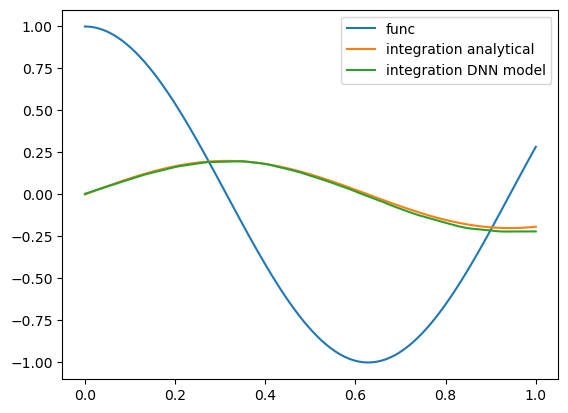

In [57]:
plt.plot(x, u_t, label = "func")
plt.plot(x, s_t, label = "integration analytical")
plt.plot(x, p, label = "integration DNN model")
plt.legend();

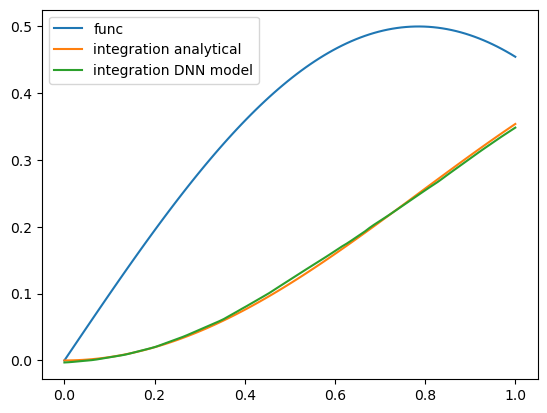

In [58]:
my_func = lambda x: np.cos(x) * np.sin(x)
inter = lambda x : 1/2*(np.sin(x))**2
u_t = my_func(x)
s_t = inter(x)

model.eval()

u_t_tens = torch.tensor(u_t, dtype = torch.float32).unsqueeze(0)
x_tens = torch.tensor(x, dtype = torch.float32).unsqueeze(1)
p = model(u_t_tens, x_tens)
p = p.detach().numpy()

plt.plot(x, u_t, label = "func")
plt.plot(x, s_t, label = "integration analytical")
plt.plot(x, p, label = "integration DNN model")
plt.legend();